### 重要性采样

In [1]:
# 导入相关包
import numpy as np

#在jupyter中显示matplotlib画的图
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# 定义正态分布（也叫高斯分布）
def gaussian(x, u, sigma):
    # u:均值, sigma:标准差
    # return x的概率密度值
    return np.exp(-(x-u)**2/(2*sigma*sigma))/np.sqrt(2*np.pi*sigma*sigma)

In [3]:
def h_func(x):
    return 6*np.exp(-10*(x-3)**4)

In [4]:
def MC(x):
    hx = h_func(x)
    return np.mean(hx), np.std(hx)

In [5]:
def IS(x):
    y = 3 + x
    hx = h_func(y)
    px = gaussian(y, 0, 1)
    qx = gaussian(y, 3, 1)
    hw= hx *px / qx
    return np.mean(hw), np.std(hw)

In [6]:
if __name__ == "__main__":
    n = 10000
    x = np.random.randn(n,1)
    MC_mean, MC_std = MC(x)
    IS_mean, IS_std = IS(x)
    print(f'MC_mean={MC_mean}, MC_std={MC_std}')
    print(f'IS_mean={IS_mean}, IS_std={IS_std}')

MC_mean=0.03255258865764868, MC_std=0.3820204082478414
IS_mean=0.03883030266075845, IS_std=0.05458573844656593


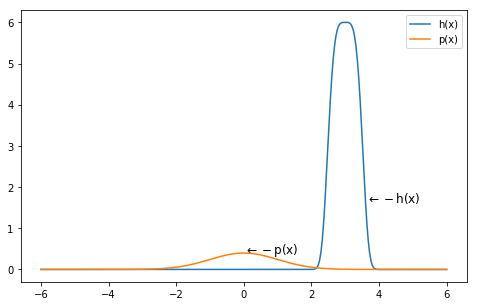

In [7]:
xs = np.linspace(-6,6,301)
y1 = [6*np.exp(-10*(x-3)**4) for x in xs]
y2 = [gaussian(x, 0.0, 1.0) for x in xs]
fig = plt.figure(figsize=(8,5))

plt.plot(xs,y1,label="h(x)")
plt.plot(xs,y2,label="p(x)")
plt.text(0,gaussian(0, 0.0, 1.0),'$\leftarrow-$p(x)',fontsize=12)
plt.text(3.6,6*np.exp(-10*(3.6-3)**4),'$\leftarrow-$h(x)',fontsize=12)

plt.legend()
plt.savefig("fig_chap7_is_example.jpg", dpi=600)
plt.show()

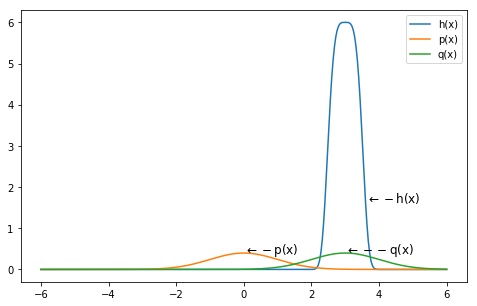

In [8]:
xs = np.linspace(-6,6,301)
y1 = [6*np.exp(-10*(x-3)**4) for x in xs]
y2 = [gaussian(x, 0.0, 1.0) for x in xs]
y3 = [gaussian(x, 3.0, 1.0) for x in xs]
fig = plt.figure(figsize=(8,5))

plt.plot(xs,y1,label="h(x)")
plt.plot(xs,y2,label="p(x)")
plt.plot(xs,y3,label="q(x)")
plt.text(0,gaussian(0, 0.0, 1.0),'$\leftarrow-$p(x)',fontsize=12)
plt.text(3,gaussian(3, 3.0, 1.0),'$\leftarrow--$q(x)',fontsize=12)
plt.text(3.6,6*np.exp(-10*(3.6-3)**4),'$\leftarrow-$h(x)',fontsize=12)

plt.legend()
plt.savefig("fig_chap7_importance_sampling.jpg", dpi=600)
plt.show()